HR EMPLOYEE ATTRITION DATASET.

This is a fictional data set created by IBM data scientists. We need to explore the dataset, understanding the algorithms and techniques which can be applied on it. We' ll try to gain meaningful insights from the dataset, like what are the factors which have an impact on Employee Attrition.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report, confusion_matrix)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')



Importing the dataset and data exploration

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


We can see that the dataset consists of 1470 rows and 35 columns(features). Let us check the number of categorcial and numerical features

In [4]:
categorical_features= df.select_dtypes(include= ['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns
print(categorical_features)
print(numerical_features)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


We have 9 categorical features in the dataset which includes our target varaible 'Attrition'.

Let us check if there any missing values in the dataset before proceeding further

In [5]:
print(df.isnull().values.any())

False


We dont have any missing values in our dataset.

Now let us do an Exploratory data analysis to see the relationship of our target variable with other variables

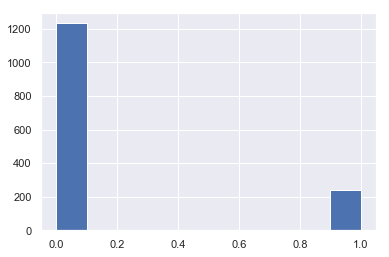

In [39]:
df.Attrition.hist()


In [6]:
Percentage_Attrition = df.Attrition.value_counts()/df.Attrition.count()
print(Percentage_Attrition)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


The above plot shows the distribution of our target variable Attrition. It shows the attrition (minority class) consists 16% of our entire sample. We can see the imbalanced distribution. We will have to balance the dataset before developing our model. In this case, we are interested in identifying the factors that lead to employee attrition(the minority class).

Let us construct a correlation matrix to see the relationship among the variables

Text(0.5, 1.0, 'Correlation map')

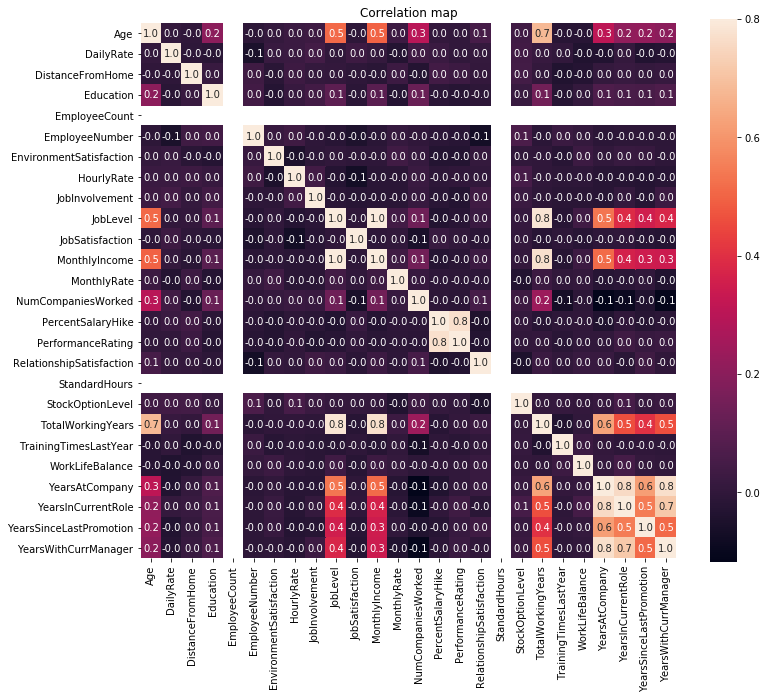

In [7]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize= (12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', vmax=.8, square=True)
plt.title('Correlation map')

The correlation matrix above shows the statistical relationship between the features. The performance of the model can deteriorate if two variables higher correlated with each other (multicollinearity). We can see that most of the features are unrelated to each other. However, we can see strong correlation among the features 'PercentSalaryHike' and 'Performance rating'. Also, 'TotalWorking' years has strong correlation with 'Joblevel' and 'MonthlyIncome'. 

Now, let us see the relationship of some features which might have role in employee attrition

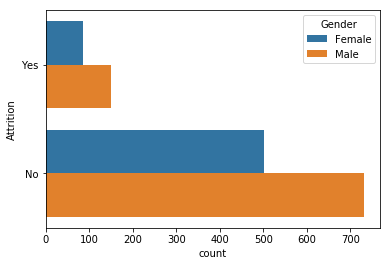

In [8]:
#Let us see who are more likely to have attrition if we consider gender as the factor
sns.countplot(y= 'Attrition', hue='Gender', data=df)
plt.show()

We can see that more number of men are likely to have Attrition compared to women.

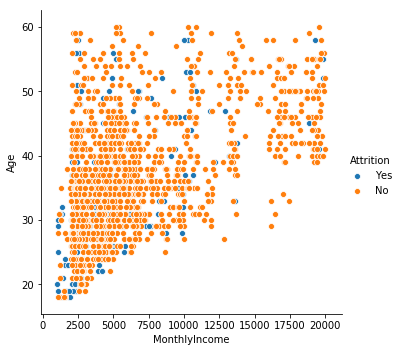

In [9]:
sns.pairplot(data=df,x_vars=['MonthlyIncome'], 
             y_vars=['Age'],height=5, hue='Attrition')

We can see that employees with Monthly income less than 7500 have more Attrition since the blue dots are more concentrated at that region.

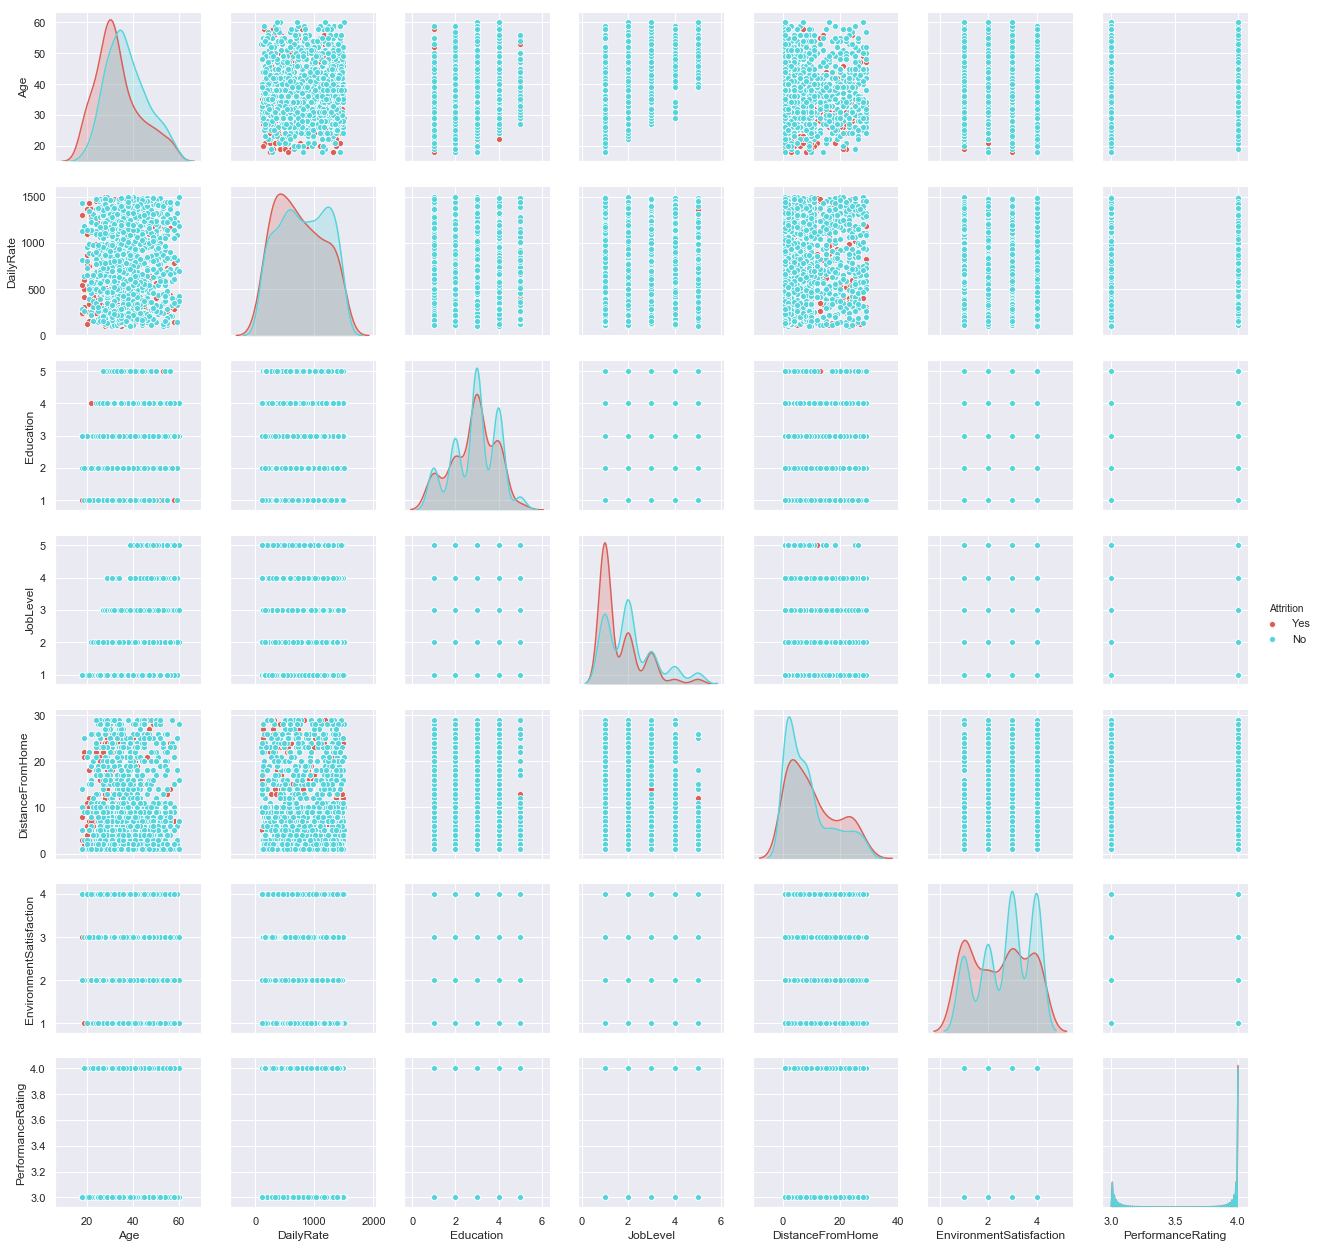

In [10]:
sns.set()
columns=['Age','DailyRate','Education','JobLevel','DistanceFromHome','EnvironmentSatisfaction','PerformanceRating','Attrition']
sns.pairplot(df[columns],hue='Attrition',height=2.5,palette="hls")

We can see employees in the lower age group are more likely to have attrition.

Employees living less than 20(minutes)distance from the home have higher attrition

Employees with lower level of environmental satisfaction seems to have higher attrition

Employees with job level(<4) seems to have higher attrition

In [11]:
#df.fillna(0, inplace=True)

Now let us convert our target variable 'Attrition' to numerical form

In [12]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

Let us develop the features and target to fit the model. We are also using 'pd.get_dummies' to get dummy variable of the categorical features.

In [14]:
features = pd.get_dummies(df.drop(columns=['Attrition','DailyRate','MaritalStatus','Over18','StandardHours',
                                           'EmployeeCount','EmployeeNumber'])).dropna()
target = df['Attrition']

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 47 columns):
Age                                  1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    1

Now let Split our datset into random train and test subsets.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features,target, stratify=target)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1102, 47)
(368, 47)
(1102,)
(368,)


 As we saw that there is class imbalance problem in our dataset for which we are going to solve the class imbalance problem. Since we are interested in minority class(Attrition) for which we will have to oversample the minority class. We are using SMOTE (Synthetic Minority Over-sampling Technique) to oversample due to the skewness in target variable.

In [17]:
from imblearn.over_sampling import SMOTE
#Let us upsample the dataset
oversampler= SMOTE(random_state=0)
smote_X_train, smote_y_train = oversampler.fit_sample(X_train, y_train)

In [18]:
print(smote_X_train.shape)
print(smote_y_train.shape)

(1848, 47)
(1848,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021100E7D9B0>]],
      dtype=object)

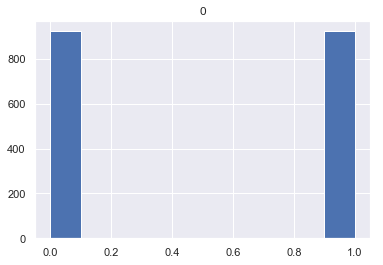

In [21]:
pd.DataFrame(smote_y_train).hist()

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
smote_X_train = sc.fit_transform(smote_X_train)
X_test = sc.transform(X_test) 

Random Forest Classifier


The Random Forest method can be grouped under the category of ensemble models. The building block of a Random Forest is the ubiquitous Decision Tree. The decision tree as a standalone model is often considered a "weak learner" as its predictive performance is relatively poor. However, a Random Forest gathers a group (or ensemble) of decision trees and uses their combined predictive capabilities to obtain relatively strong predictive performance - "strong learner". Let us define the set of parameters that will feed into our Random Forest Classifier model.

In [23]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [24]:
#Fitting the model 
rfm = RandomForestClassifier(** rf_params)
rfm.fit(smote_X_train, smote_y_train)
rfm_predictions = rfm.predict(X_test)
print('Accuracy Score for Random Forest Model:', rfm.score(X_test, y_test))
print(classification_report(y_test, rfm_predictions)) 
Confusion_matrix = confusion_matrix(y_test, rfm_predictions)
print(Confusion_matrix)

Accuracy Score for Random Forest Model: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       309
           1       0.62      0.47      0.54        59

   micro avg       0.87      0.87      0.87       368
   macro avg       0.76      0.71      0.73       368
weighted avg       0.86      0.87      0.86       368

[[292  17]
 [ 31  28]]


Feature Ranking via the Random Forest

The Random Forest classifier in Sklearn also contains a very convenient attribute feature importance which tells us which features within our dataset has been given most importance through the Random Forest algorithm. Shown below is a bar diagram of the various important features.

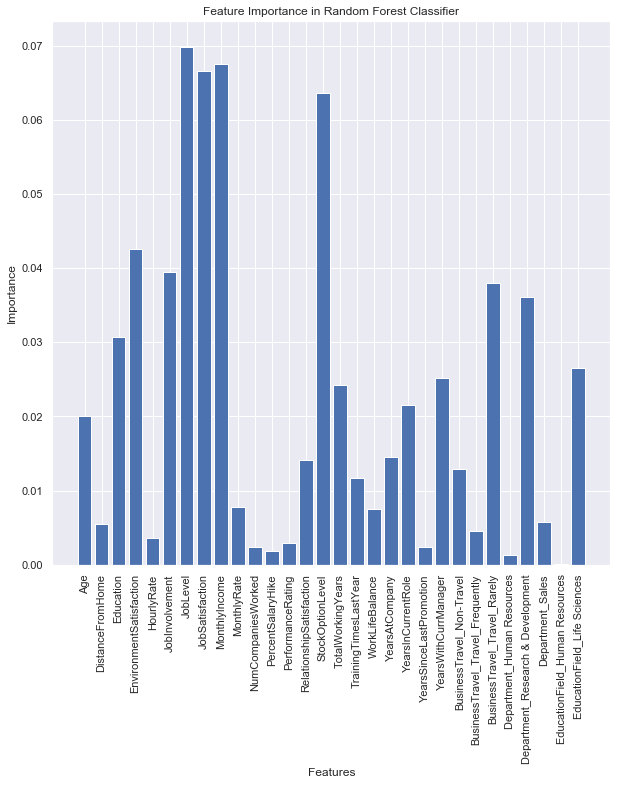

In [25]:
plt.figure(figsize=(10,10))
plt.bar(features.columns[0:30], rfm.feature_importances_[0:30])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

Visualising Tree Diagram with Graphviz

Let us now visualize how a single decision tree traverses the features in our data. The DecisionTreeClassifier object of sklearn comes with a very convenient export_graphviz method that exports the tree diagram into a .png format which we can view from the output of this kernel.

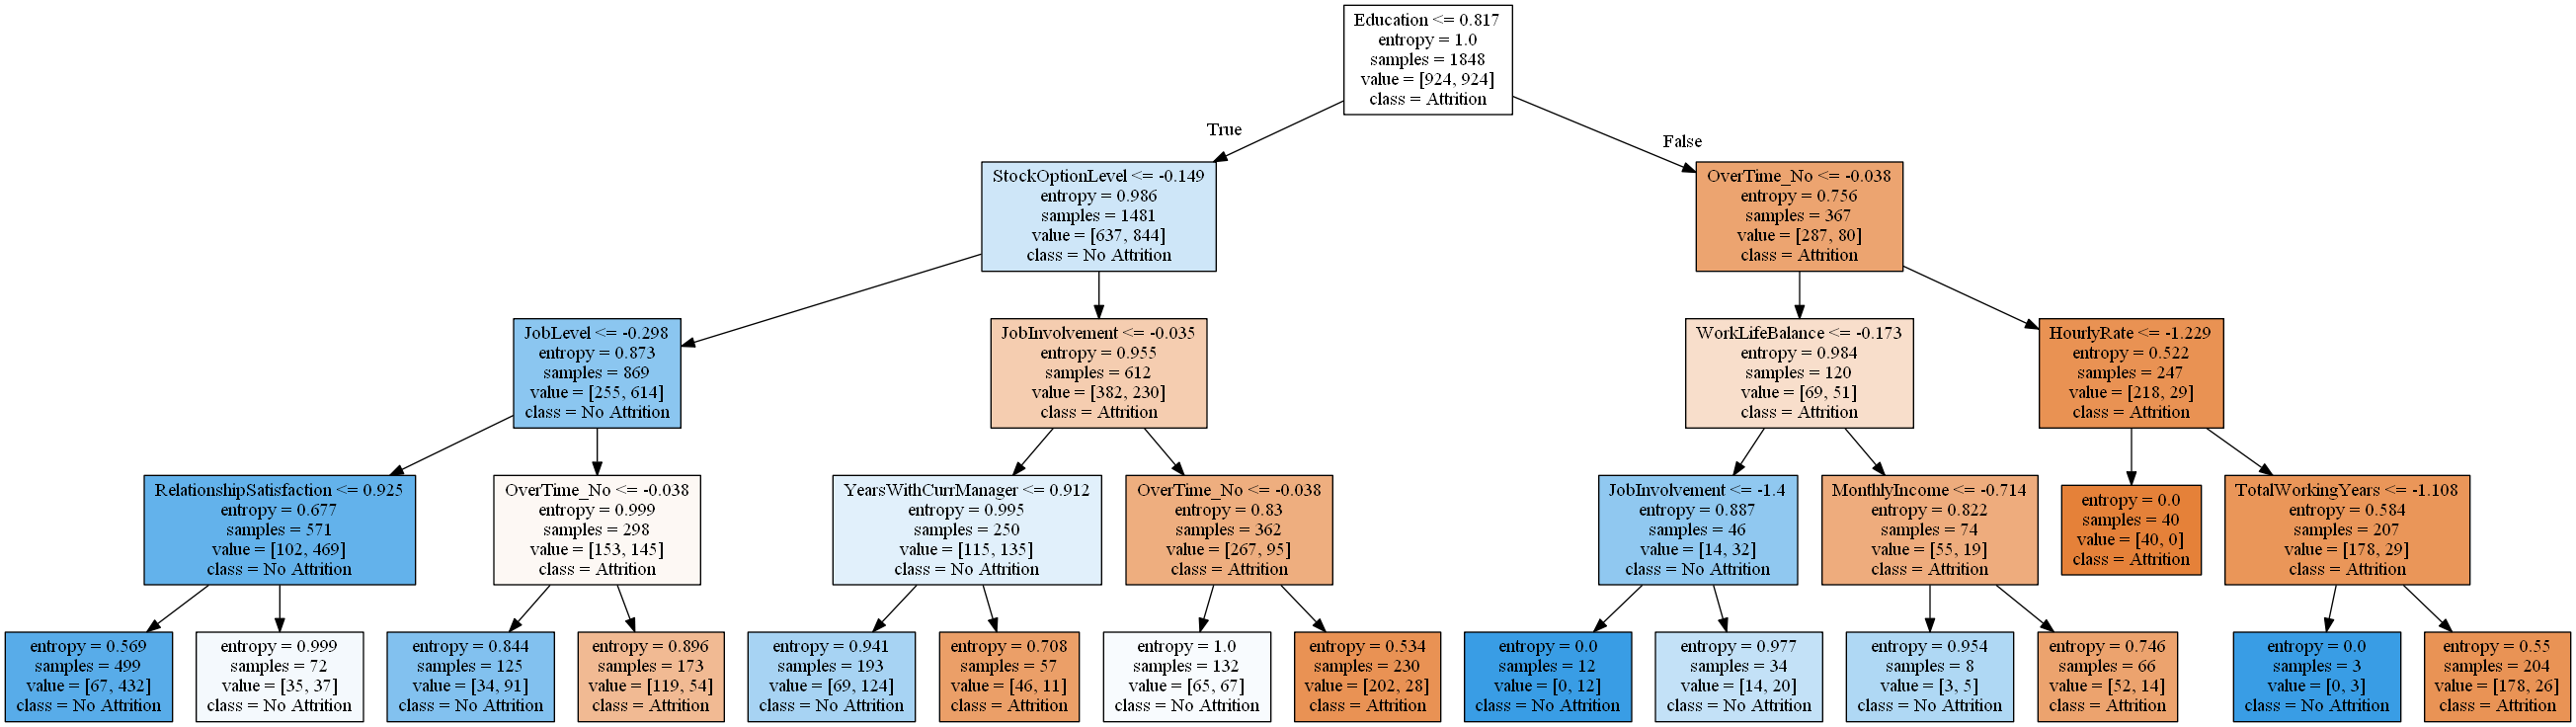

In [26]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=0.3,
    max_depth=4,
    random_state = 0
)
decision_tree.fit(smote_X_train, smote_y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features.columns,
    class_names=['Attrition', 'No Attrition'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Gradient Boosting Classifier


Gradient Boosted Classifier Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak tree learners are brought together to form a relatively stronger learner. The technique involves defining some sort of function (loss function) that we want to minimise and a method/algorithm to minimize this. Therefore, as the name suggests, the algorithm used to minimize the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).
Initializing Gradient Boosting Parameters

Let us set the paramateters to fit into our Gradient Boosting Classifier

In [27]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [28]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_X_train, smote_y_train)
# Get our predictions
gb_predictions = gb.predict(X_test)
print('Accuracy score for Gradient Boosting Classifier:', gb.score(X_test, y_test))
print(classification_report(y_test, gb_predictions))
Confusion_matrix = confusion_matrix(y_test, gb_predictions)
print(Confusion_matrix)

Accuracy score for Gradient Boosting Classifier: 0.8994565217391305
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       309
           1       0.81      0.49      0.61        59

   micro avg       0.90      0.90      0.90       368
   macro avg       0.86      0.73      0.78       368
weighted avg       0.89      0.90      0.89       368

[[302   7]
 [ 30  29]]


Fature Ranking via Gradient Boosting Classifier

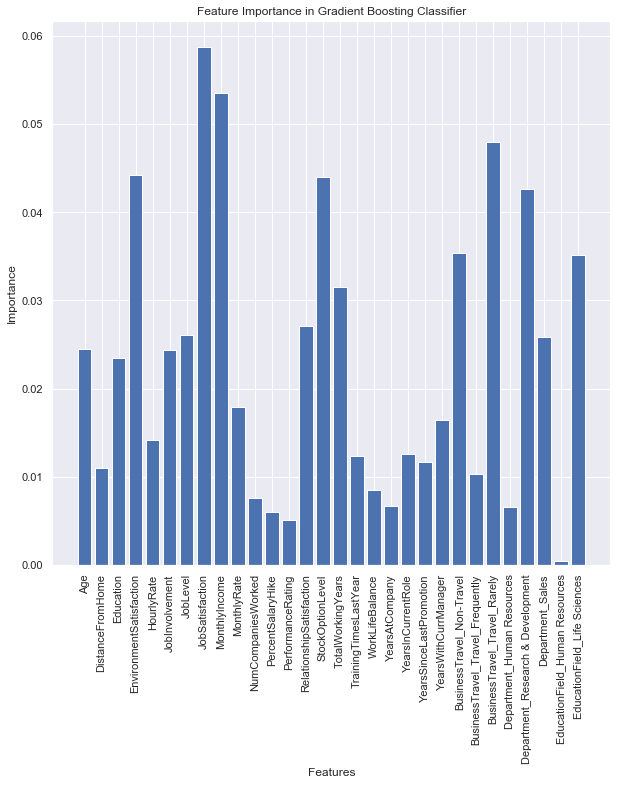

In [29]:
plt.figure(figsize=(10,10))
plt.bar(features.columns[0:30], gb.feature_importances_[0:30])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.show()

Logistic Regression

In [30]:
#Fitting the model
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)
print('Accuracy Score for Logistic Regression Model:', lr.score(smote_X_train, smote_y_train))
print(classification_report(y_test, lr_pred))
Confusion_matrix = confusion_matrix(y_test, lr_pred)
print(Confusion_matrix)

Accuracy Score for Logistic Regression Model: 0.7294372294372294
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       309
           1       0.28      0.76      0.41        59

   micro avg       0.65      0.65      0.65       368
   macro avg       0.61      0.70      0.58       368
weighted avg       0.83      0.65      0.70       368

[[195 114]
 [ 14  45]]


Stochastic Gradient Descent (SGD) Classifier

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_params = {'alpha': 0.0001,
              'class_weight': None,
              'l1_ratio': 1,
              'loss': 'log',
              'penalty': 'elasticnet',
              'random_state': 1, 
              'shuffle': True}
sgd = SGDClassifier(**sgd_params)
sgd.fit(smote_X_train, smote_y_train)
print('Accuracy Score for SGD Model:', sgd.score(X_test, y_test)) 
Confusion_matrix = confusion_matrix(y_test, sgd.predict(X_test))
print(Confusion_matrix)

Accuracy Score for SGD Model: 0.8641304347826086
[[288  21]
 [ 29  30]]


Grid Search on the winning model (Random Forest Classifier)

In [33]:
#Grid search for RF 
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(smote_X_train, smote_y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [34]:
print('Accuracy score of Random Forest Model after Grid Search:', rf_random.score(X_test, y_test))
rf_predict = rf_random.predict(X_test)
print(classification_report(y_test, rf_predict))
Confusion_matrix = confusion_matrix(y_test, rf_predict)
print(Confusion_matrix)

Accuracy score of Random Forest Model after Grid Search: 0.8885869565217391
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       309
           1       0.91      0.34      0.49        59

   micro avg       0.89      0.89      0.89       368
   macro avg       0.90      0.67      0.72       368
weighted avg       0.89      0.89      0.87       368

[[307   2]
 [ 39  20]]


CONCLUSION

We have identified a simple pipeline of prediciting employee attrition from basic Exploratory Data Analysis, feature engineering and implementing three models; Random Forest Classifier, Gradient Boosting Classifier, Logistic Regression AND SGD classifier.We also did a grid search in our winning model (Random Forest) and fitted the model which doesnt give any improved result. 
The feature importance diagram shows similar predictors (StockOptionLevel, JobInvolvement, JobSatisfaction) being the top predictors for attrition. 
Random forest is winning model with best type2 error even though overall accuracy (85%) is slightly lower than gradient boosting (87%) 

In [35]:
#NN: But only issue is that we don't have enough data points to make robust NN, so wish list 
dropout = 0.1
epochs = 10
batch_size = 30
optimizer = 'adam'
k = 20


# Evaluating the NN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# def build_classifier():
#     model = Sequential()
#     model.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (smote_X_train.shape[1],)))
#     model.add(Dropout(dropout))
#     model.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
#     model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
#     return model
# model = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
# accuracies = cross_val_score(estimator = classifier, X = smote_X_train, y = smote_y_train, cv = 30)
# max = accuracies.max() 

Using TensorFlow backend.


In [36]:
model = Sequential()
model.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (smote_X_train.shape[1],)))
model.add(Dropout(dropout))
model.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])


model.fit(smote_X_train, smote_y_train, epochs=100, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [37]:
NN_pred= pd.Series(model.predict_classes(X_test).reshape(-1))

In [38]:
confusion_matrix(y_test, NN_pred)

array([[282,  27],
       [ 26,  33]], dtype=int64)